In [18]:
import cocpit
import matplotlib.pyplot as plt
import torch
from cocpit import config as config
import numpy as np


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Override matplotlib default styling.
plt.style.use("seaborn")

plt.rc("font", size=12)
plt.rc("axes", labelsize=12)
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)
plt.rc("legend", fontsize=12)

plt.rc("axes", titlesize=16)
plt.rc("figure", titlesize=16)

In [3]:
#  make predictions on each batch of images,
#  and concatenate the precitions across batches
p = cocpit.predictions.LoaderPredictions()
with torch.no_grad():
    for fold in range(config.KFOLD+1):
        model = p.load_model(fold)
        val_loader = p.load_val_loader(fold)
        for ((imgs, labels, paths), batch) in val_loader:
            b = cocpit.predictions.BatchPredictions(imgs, model)
            b.find_max_preds()
            b.top_k_preds(len(config.CLASS_NAMES))
            p.append_batch(b, paths, labels)
p.concatenate_loader_vars()

/data/data/cocpit/plotting_scripts/reliability.py:229: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Also negate the ticks for the upside-down histogram.


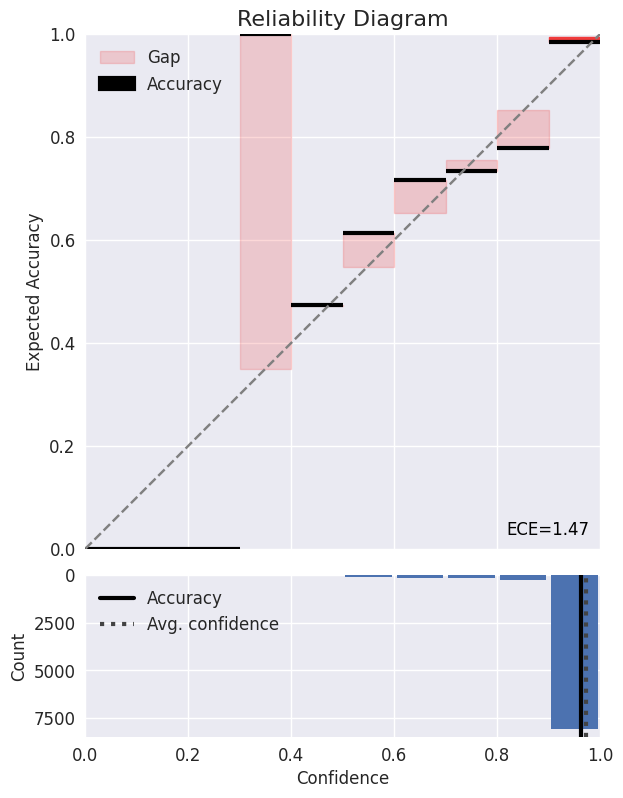

In [20]:
fig = cocpit.plotting_scripts.reliability.reliability_diagram(np.array([i.item() for i in p.labels]), np.array(p.max_preds), np.array([i[0] for i in p.topk_probs]), num_bins=10, draw_ece=True,
                          draw_bin_importance="alpha", draw_averages=True,
                          title='Reliability Diagram', figsize=(6, 6), dpi=100, 
                          return_fig=True)